## Import Data and Settings

In [1]:
#import all the libraries needed
from imports import *
# import my functions
from function_store import *

#---------------------------------SETUP Plotting---------------------------------#
# Set global line width
plt.rcParams['lines.linewidth'] = 3  # Change this to your desired line width
# Set global font size for labels on matplotlib plots
plt.rcParams['axes.labelsize'] = 15  # Change this to your desired font size
plt.rcParams['xtick.labelsize'] = 15  # Change this to your desired font size
plt.rcParams['ytick.labelsize'] = 15  # Change this to your desired font size

#---------------------------------Import Data---------------------------------#
# Define the path out to the output directory where data is saved
path_out =  ('/Users/horatiocox/Library/CloudStorage/OneDrive-UniversityCollegeLondon/A-PostDoc/Presentations/CIMTEC/VNA/')

# Define the path in to the directories containing the VNA data
directory_2 = ('/Users/horatiocox/Desktop/VNA_Analysis/mag_angle_260424/')
directory_3 = ('/Users/horatiocox/Desktop/VNA_Analysis/CPW_mem_oscillator_220524/Oscillator/')
# directory_1 = ('/Users/horatiocox/Desktop/VNA_Analysis/CPW_mem_oscillator_220524/Memristor/')

# Import the data from the VNA files
# s2p_files_1 = import_data(directory_1)
s2p_files_2 = import_data(directory_2)
# s2p_files_3 = import_data(directory_3)
# Remove duplicate frequency points from all the thru data to prevent errors with skrf functions
# s2p_files_1 = duplicate_check(s2p_files_1)
s2p_files_2 = duplicate_check(s2p_files_2)
# s2p_files_3 = duplicate_check(s2p_files_3)

# Separate the simulation data so no filtering is applied
# s2p_files_2_sim = s2p_files_2[-1]
# s2p_files_2 = s2p_files_2[:-1]

1 run1_r0c0_thru Wafer0_r0_c0_ISS_thru_LRM+_1.S2P
2 run2_rNonecNone_thru ISS_thru_LRRM_1.S2P
3 run3_r10c1_thru Wafer2_r10_c1_thru_1.S2P
4 run4_r10c13_thrunotaper Wafer2_r10_c13_thrunotaper_1.S2P
5 run5_r10c5_open Wafer2_r10_c5_open_1.S2P
6 run6_r10c9_opensig Wafer2_r10_c9_opensig_1.S2P
7 run7_r10c11_short Wafer2_r10_c11_short_1.S2P
8 run8_r1c2_pristine Wafer2_r1_c2_pristine_1.S2P
9 run9_r1c2_pristine Wafer2_r1_c2_pristine 2_1.S2P
10 run10_r1c3_pristine Wafer2_r1_c3_pristine_1.S2P
11 run11_r1c4_pristine Wafer2_r1_c4_pristine_1.S2P
12 run12_r1c5_pristine Wafer2_r1_c5_pristine_1.S2P
13 run13_r1c6_pristine Wafer2_r1_c6_pristine_1.S2P
14 run14_r1c7_pristine Wafer2_r1_c7_pristine_1.S2P
15 run15_r1c7_pristine Wafer2_r1_c7_pristine 2_1.S2P
16 run16_r1c8_pristine Wafer2_r1_c8_pristine_1.S2P
17 run17_r1c9_pristine Wafer2_r1_c9_pristine_1.S2P
18 run18_rNonecNone_thru ISS_thru_LRM+_log_1.S2P
19 run19_r1c2_pristine Wafer2_r1_c2_pristine_log_1.S2P
20 run20_r1c3_pristine Wafer2_r1_c3_pristine_log_1.S

### De-embedding the data

open_short_thru 2 1 1
[4009.9902197730135, 4003.710304053904]
Best de-embedding protocol: dm[1] = 4003.710304053904, worst:dm[0] = 4009.9902197730135


/Users/horatiocox/Desktop/VNA_Analysis/VNAenv/lib/python3.9/site-packages/skrf/calibration/deembedding.py:1069: RuntimeWarning: Non-uniform frequency vector detected. An interpolated S-parameter matrix will be created for
                   this calculation. The output results will be re-interpolated to the original vector.
  self.s_side1, self.s_side2 = self.split2xthru(self.s2xthru)


[0.0]
Best TX de-embedding protocol: dm[0] = 0.0, worst:dm[0] = 0.0


/var/folders/xr/wc8tnsks36n8ywxxvqplwqch0000gn/T/ipykernel_94398/2493400477.py:19: RuntimeWarning: Network frequencies dont match dummy frequencies, attempting overlap.
  f.network = OS.deembed(f.network)
/var/folders/xr/wc8tnsks36n8ywxxvqplwqch0000gn/T/ipykernel_94398/2493400477.py:21: RuntimeWarning: Network frequencies dont match dummy frequencies, attempting overlap.
  f.network = TX.deembed(f.network)
/Users/horatiocox/Desktop/VNA_Analysis/VNAenv/lib/python3.9/site-packages/skrf/calibration/deembedding.py:1093: RuntimeWarning: Non-uniform frequency vector detected. An interpolated S-parameter matrix will be created for
                   this calculation. The output results will be re-interpolated to the original vector.
  s_side1, s_side2 = self.split2xthru(s2xthru)


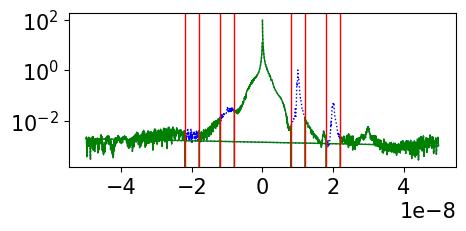

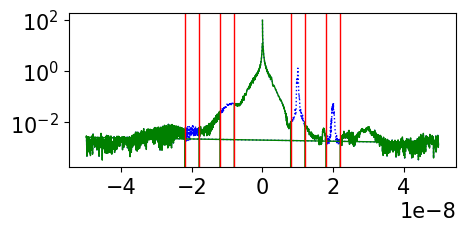

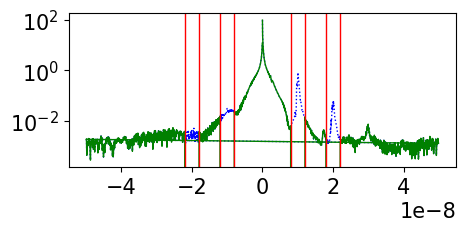

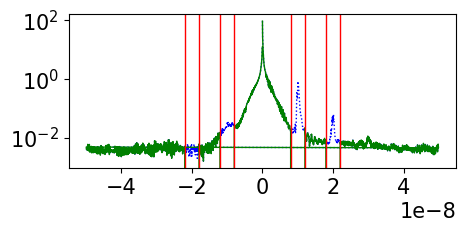

In [7]:
#-------------------Grouping-------------------
# Select the On Wafer Calibration files to be used
ISS_thru = [s for s in s2p_files_2 if s.state == 'thru' and s.wafer_number == 0]
cal_thru = [s2p_files_2[2]]#[s for s in s2p_files_2 if s.state == 'thru' and s.wafer_number != 0] #[s2p_files_2[22],s2p_files_2[23]]#
cal_open = [s for s in s2p_files_2 if s.state == 'open' or s.state == 'opensig']
cal_short = [s for s in s2p_files_2 if s.state == 'short']
print('open_short_thru',len(cal_open),len(cal_short),len(cal_thru))

#-------------------De-Embedding-------------------
# Get the de-embedding objects
OS = calibration_OS(cal_open, cal_short, cal_thru, plot_cal = False) #Open Short De-embedding
TX = calibration_2x(cal_thru, plot_cal = False) #2x through De-embedding

# Go through and de-embed all data
sp2_files_2_OS = copy.deepcopy(s2p_files_2)
sp2_files_2_TX = copy.deepcopy(s2p_files_2)

for f in sp2_files_2_OS:
    f.network = OS.deembed(f.network)
for f in sp2_files_2_TX:
    f.network = TX.deembed(f.network)

# My ABCD cascade based de-embedding - doesn't use SKRF so kept separate as uses a different data structure
ABCD = calibration_ABCD(cal_thru, plot_cal = False) # Generate the de-embedding matrix
s2p_files_2_ABCD = deembed_ABCD(copy.deepcopy(s2p_files_2), ABCD) # Apply the de-embedding matrix

#-------------------FFT Filtering-------------------
plt.rcParams['lines.linewidth'] = 1  # Change this to your desired line width
# Select bandstop frequency components
threshold_values = [[1.8e-8,2.2e-8],[0.8e-8,1.2e-8]]

# Apply the FFT to the raw data (to dupilcated data to avoid overwriting), filter out components then IFFT
sp2_files_2_FFT = fourier_filter(copy.deepcopy(s2p_files_2), threshold = threshold_values,t_window = 0.02)   

# Apply the FFT to the de-embedded data (to dupilcated data to avoid overwriting), filter out components then IFFT
sp2_files_2_OS_FFT = fourier_filter(copy.deepcopy(sp2_files_2_OS), threshold = threshold_values,t_window = 0.02)  
s2p_files_2_TX_FFT = fourier_filter(copy.deepcopy(sp2_files_2_TX), threshold = threshold_values,t_window = 0.02)
s2p_files_2_ABCD_FFT = fourier_filter(copy.deepcopy(s2p_files_2_ABCD), threshold = threshold_values,t_window = 0.02)   



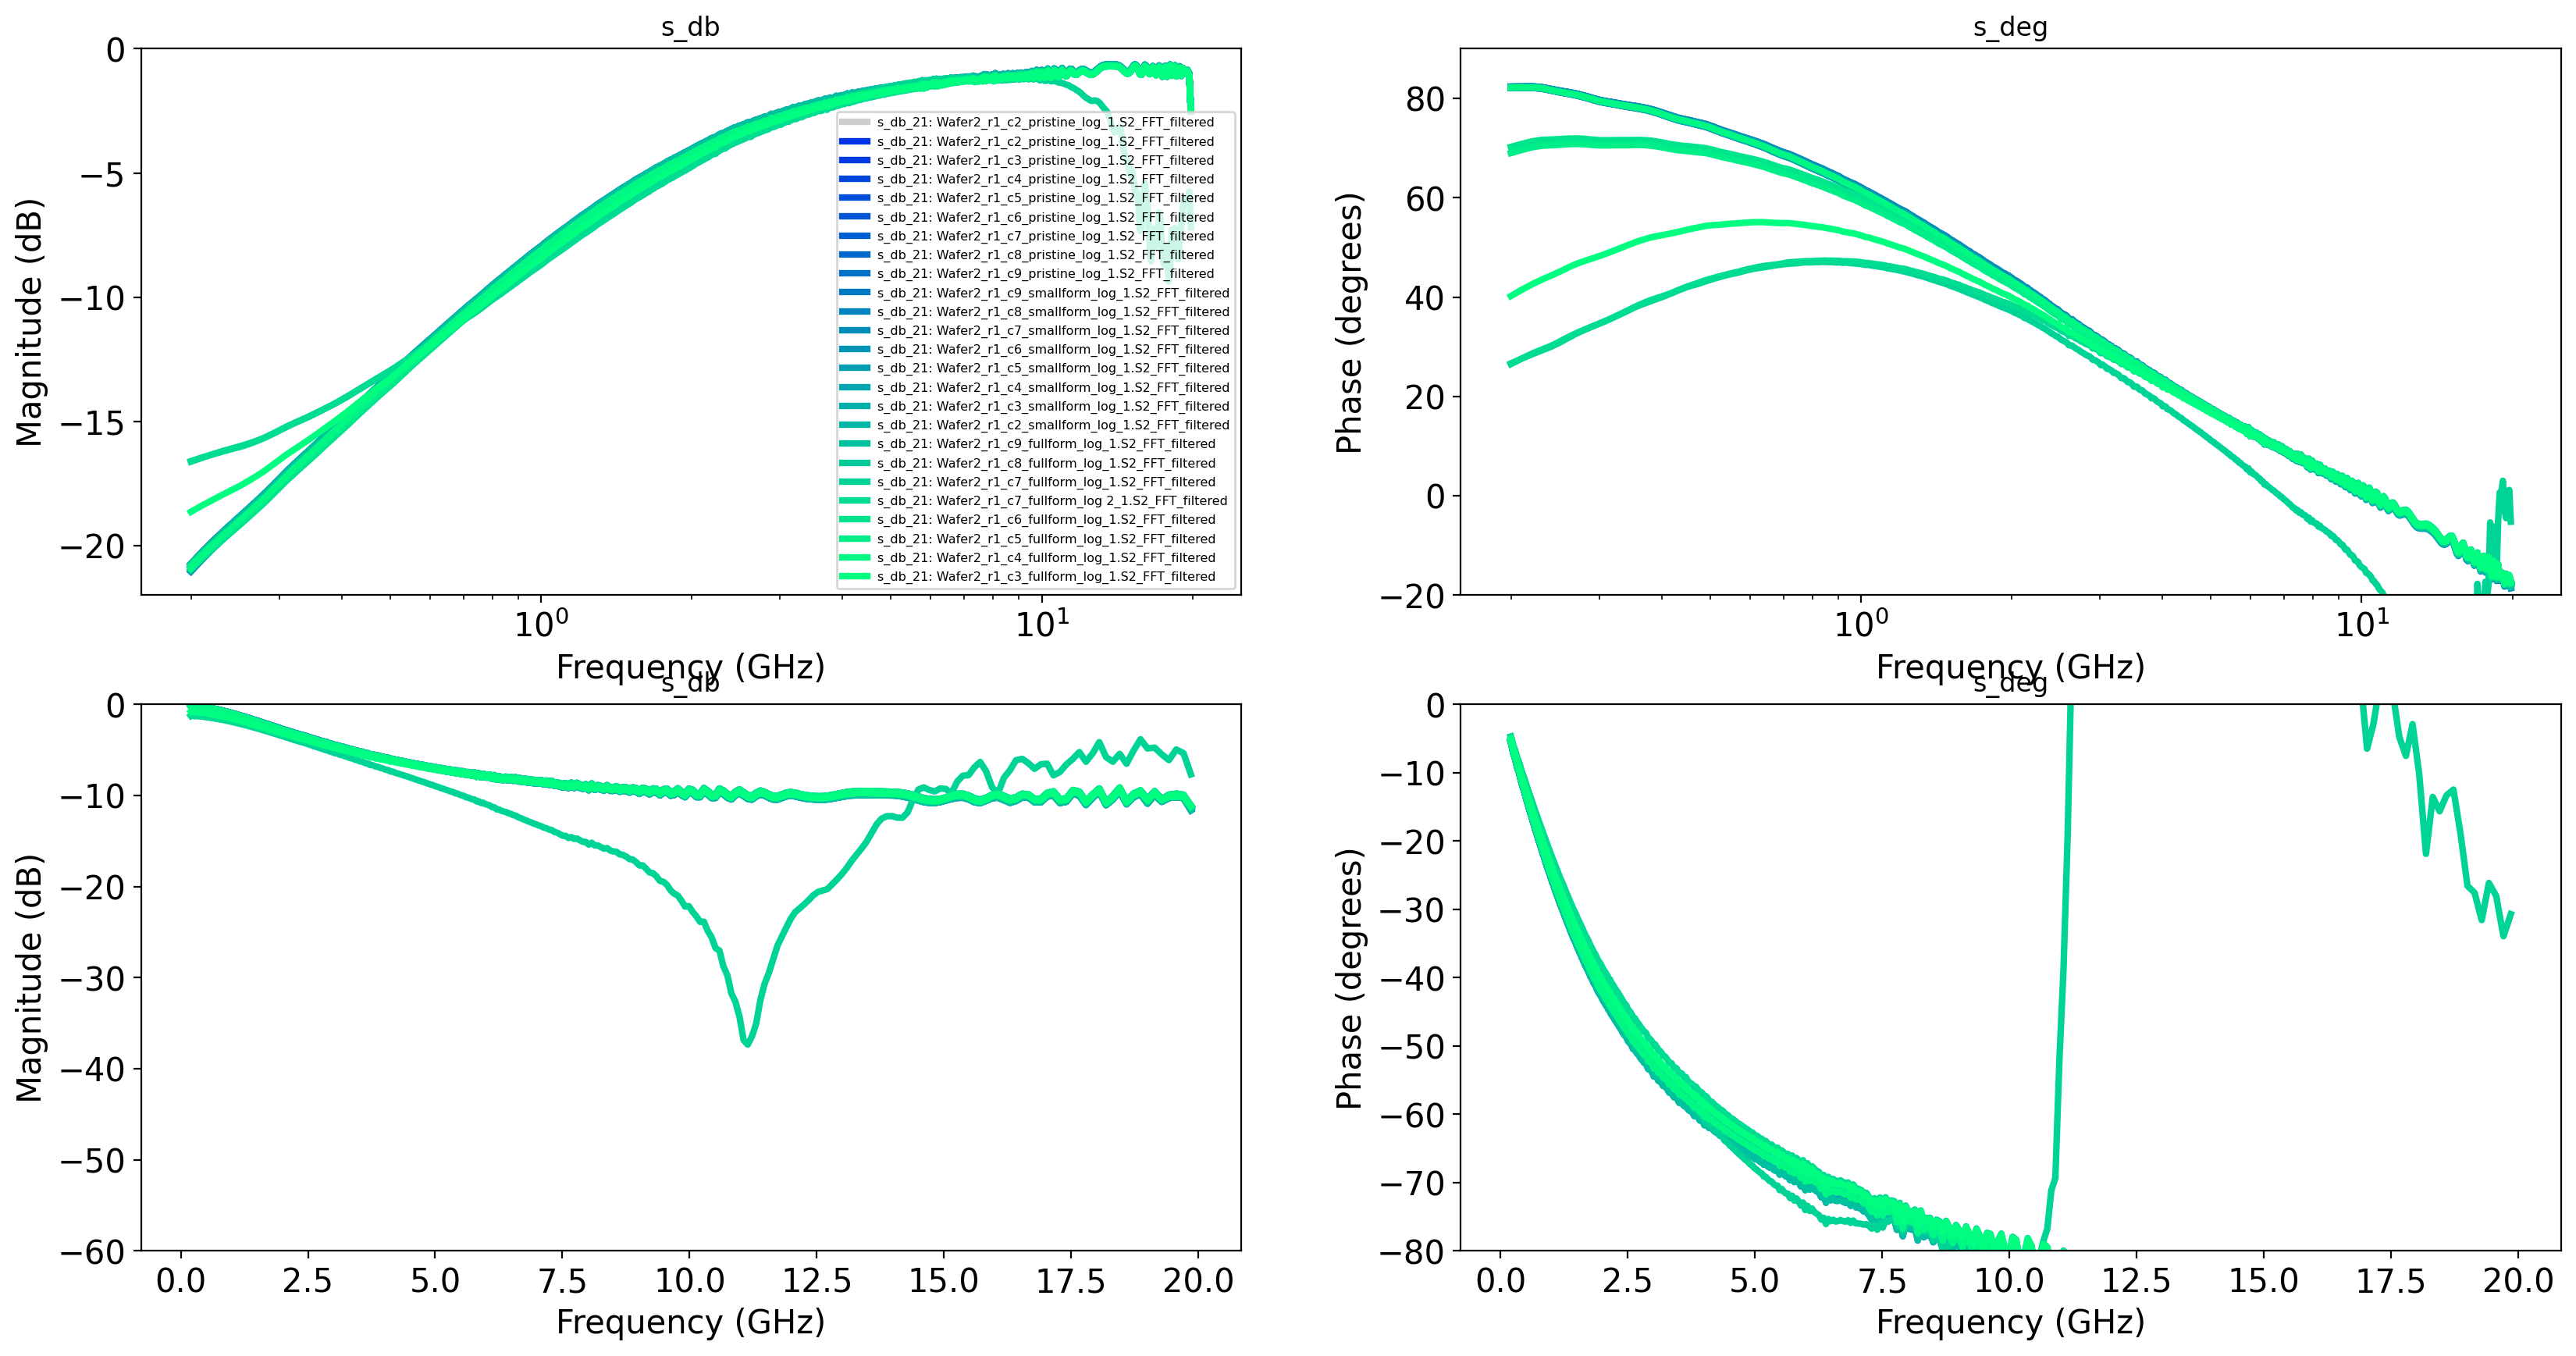

In [16]:
#-------------------Selecting Data-------------------
# format: s2p_files_[number]_[None/OS/Tx/ABCD]_[None/FFT]
#r_num =[[23],[62,63],[56,60]]
r_num = [[19],list(range(19, 43))]
p_1 = subgen(s2p_files_2, r_num)[0]
p_2 = subgen(sp2_files_2_FFT, r_num)
p_3 = subgen(s2p_files_2_ABCD, r_num)[0]
p_4 = subgen(s2p_files_2_ABCD_FFT, r_num)
plot_data_1 = p_2
plot_data_2 = [p_1,p_2,p_3,p_4]


#-------------------Plotting-------------------
plt.rcParams['lines.linewidth'] = 3  # Change this to your desired line width
f = plt.figure(figsize=(20,10),dpi=200)
gs = f.add_gridspec(2, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

sub_plot(ax=ax, dev_subset=plot_data_1, plot_type=['s_db'], log_x=True, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [-22,0],x_range='0.2-19.8ghz')
sub_plot(ax=ax1, dev_subset=plot_data_1, plot_type=['s_deg'], log_x=True, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[-20,90], x_range='0.2-19.8ghz',p_legend=False)
sub_plot(ax=ax2, dev_subset=plot_data_1, plot_type=['s_db'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range = [-60,0],x_range='0.2-19.8ghz',p_legend=False)
sub_plot(ax=ax3, dev_subset=plot_data_1, plot_type=['s_deg'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range=[-80,0], x_range='0.2-19.8ghz',p_legend=False)


#plt.savefig(os.path.join(path_out, 'memcomp_sdb11.svg'), format='svg')

plt.show()

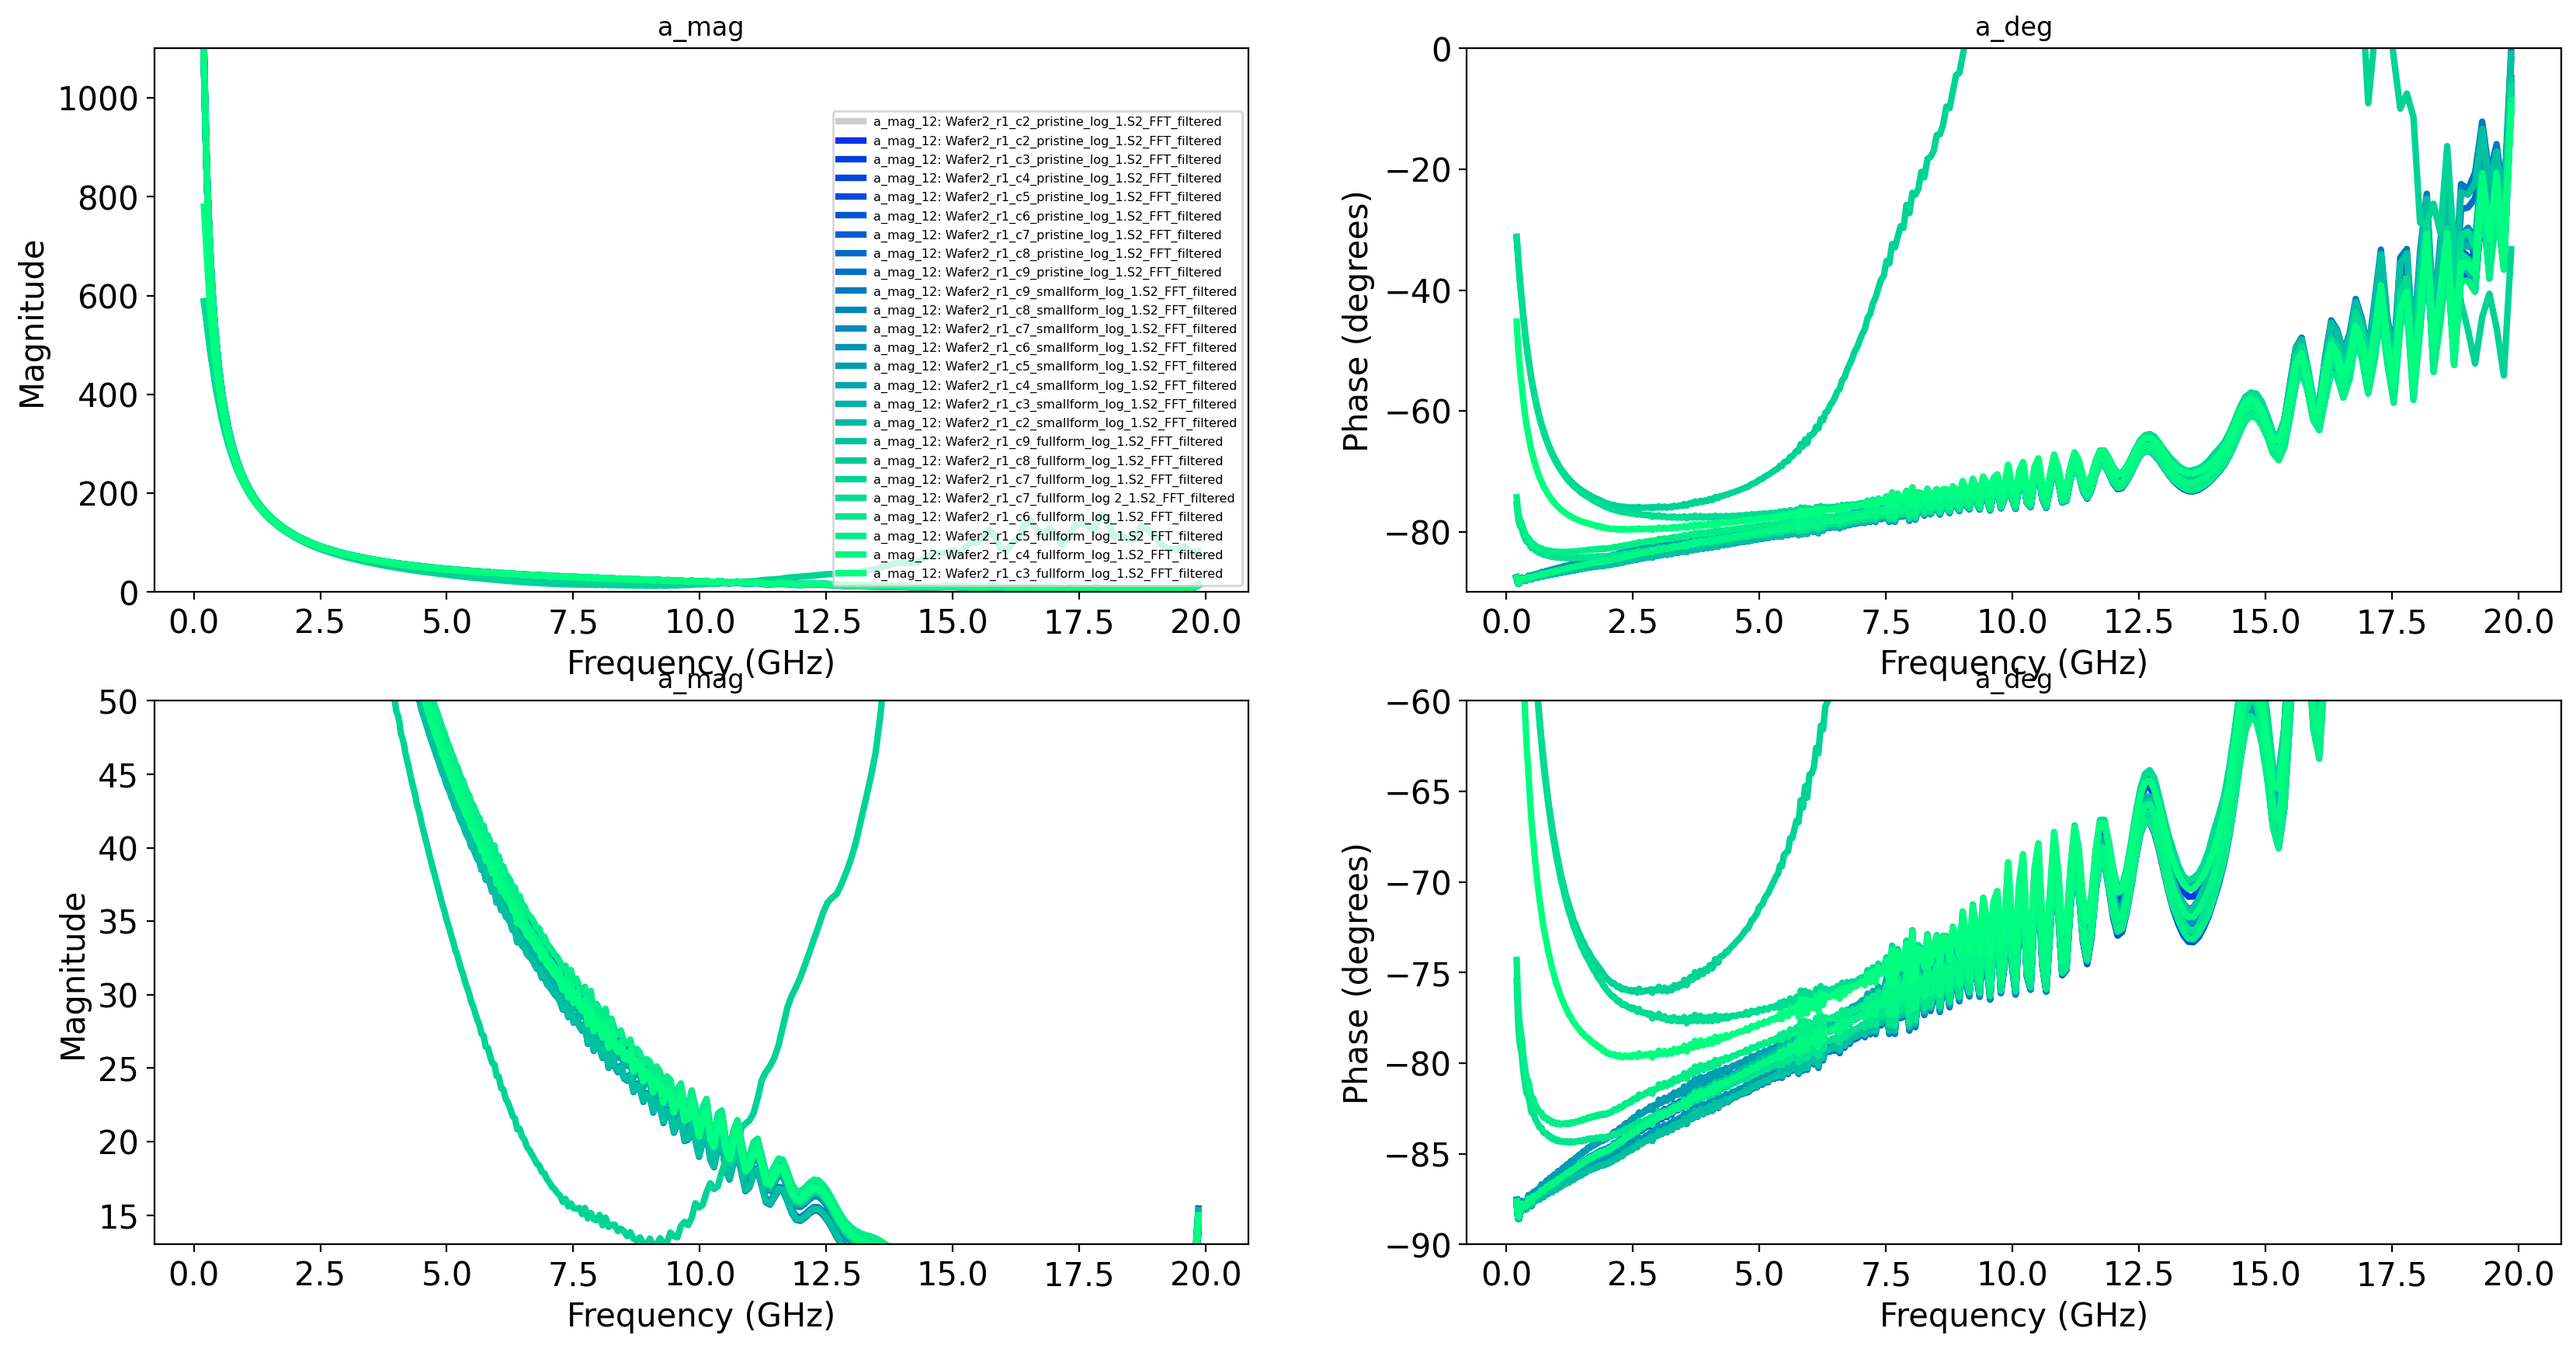

In [17]:
#-------------------Plotting-------------------
plt.rcParams['lines.linewidth'] = 3  # Change this to your desired line width
f = plt.figure(figsize=(20,10),dpi=200)
gs = f.add_gridspec(2, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

sub_plot(ax=ax, dev_subset=plot_data_1, plot_type=['a_mag'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range = [0,1100],x_range='0.2-19.8ghz')
sub_plot(ax=ax1, dev_subset=plot_data_1, plot_type=['a_deg'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[-90,0], x_range='0.2-19.8ghz',p_legend=False)
sub_plot(ax=ax2, dev_subset=plot_data_1, plot_type=['a_mag'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range = [13,50],x_range='0.2-19.8ghz',p_legend=False)
sub_plot(ax=ax3, dev_subset=plot_data_1, plot_type=['a_deg'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[-90,-60], x_range='0.2-19.8ghz',p_legend=False)


#plt.savefig(os.path.join(path_out, 'memcop_ZDUT_abcd22.svg'), format='svg')

plt.show()

### FFT and skrf De-embedding

In [ ]:

s2p_files_2_filt = copy.deepcopy(s2p_files_2)
# Select bandstop frequency components
threshold_values = [[1.8e-8,2.2e-8],[5.9e-8,6.15e-8],[3.9e-8,4.05e-8],[2.9e-8,3.05e-8],[7.95e-8,8.05e-8],[6.45e-8,6.55e-8],[6.96e-8,7.06e-8]]
# Apply the FFT, filter out components then IFFT
s2p_files_2_filt = fourier_filter(s2p_files_2_filt, threshold = threshold_values,t_window = 0.02) #apply to deepcopy to avoid modifying the original data


#-------------------Grouping-------------------
# Select the On Wafer Calibration files to be used
ISS_thru_filt = [s for s in s2p_files_2_filt if s.state == 'thru' and s.wafer_number == 0]
cal_thru_filt = [s for s in s2p_files_2_filt if s.state == 'thru' and s.wafer_number != 0]
cal_open_filt = [s for s in s2p_files_2_filt if s.state == 'open' or s.state == 'opensig']
cal_short_filt = [s for s in s2p_files_2_filt if s.state == 'short']

#-------------------De-Embedding-------------------
OS_filt = calibration_OS(cal_open_filt, cal_short_filt, cal_thru_filt, plot_cal = False) #calibration object outputted from all the on wafer measurements
TX_filt = calibration_2x(cal_thru_filt, plot_cal = False) #calibration object outputted from all the on wafer measurements


### Manual De-Embedding from ABCD of Thru

### Transform RC paralle Model to generate ABCD/S parameters

### Transform Measured Data to Circuit Model
- Use DC measured R to generate arrays of Capacitance vs Frequency for each dataset
- Use approx Cap value to generate R vs freq for low frequencies
    - Thus showing R and C variation in switching 